Dataset: Credit Card Customer Dataset

The dataset shows the cutomer's spending behaviour on various credit cards. 

Feature Attritbutes
CLIENTNUM - Client Id	
Education_Level - Level of Customer Education	
Card_Category - Types of Credit Card Category
Months_on_book - Tenure of the Customer
Total_Relationship_Count - Number of Banking Products
Months_Inactive_12_mon	- Number of months Not Active in a year
Credit_Limit - Limit for Credit on the card
Total_Revolving_Bal	- Unpaid balance on the card
Avg_Utilization_Ratio -   Total_Revolving_Bal\Credit_Limit - Proportion of the limit used
Total_Trans_Amt	- Total Amount Spend
Total_Trans_Ct - Total Number of Transactions

Business Problem - The bank would like to know the distinct groups of customers existing in their bank. And, with the outcome of the analysis the bank would provide marketing offers to relevant customers.

# Data Exploration

### Importing the neccessary libraries for EDA

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
%matplotlib inline 
#To make sure that plots are rendered correctly in jupyter notebooks.

In [33]:
### Warning Suppression 

import warnings
warnings.filterwarnings('ignore')

In [34]:
### Load the Data

df = pd.read_excel(r"C:\Users\priya\PycharmProjects\clustering_project_1\data\card_customer_data.xlsx")

In [35]:
### Shape of the Data

r,c = df.shape

print(f"The number of rows and columns in dataframe is {r} and {c} respectively.")

The number of rows and columns in dataframe is 3078 and 11 respectively.


In [36]:
### Setting Display options to ensure feature name visibility

pd.set_option('display.max_columns',None)

# To view the first 5 rows in the dataset
df.head()

,CLIENTNUM,Education_Level,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Utilization_Ratio,Total_Trans_Amt,Total_Trans_Ct
0,769911858,High School,Blue,34,3,4,3313.0,2517,0.760,1171,20
1,713061558,Graduate,Blue,36,3,1,4010.0,1247,0.311,1088,24
2,818906208,High School,Silver,27,2,2,29081.0,1396,0.048,1538,36
3,710599683,College,Blue,36,3,6,11751.0,0,0.000,1539,17
4,712396908,Graduate,Blue,48,5,2,2436.0,680,0.279,1570,29


In [37]:
# To view the last 5 rows in the dataset
df.tail()

,CLIENTNUM,Education_Level,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Utilization_Ratio,Total_Trans_Amt,Total_Trans_Ct
3073,714471183,Graduate,Blue,39,4,3,17504.0,476,0.027,10468,66
3074,710734308,Graduate,Blue,40,6,3,6481.0,1569,0.242,15937,119
3075,714109308,College,Blue,36,1,2,13187.0,2241,0.170,15354,112
3076,713755458,Unknown,Blue,36,6,3,9959.0,952,0.096,10310,63
3077,772366833,Graduate,Blue,40,3,2,4003.0,1851,0.462,15476,117


In [38]:
df = df.drop(['CLIENTNUM'],axis=1) #this column is irrelavant in analysis and model building

## The Data types of each column 

In [39]:
# Data type of each column
data_types=pd.DataFrame(df.dtypes,columns=['Data_Type'])
data_types

,Data_Type
Education_Level,object
Card_Category,object
Months_on_book,int64
Total_Relationship_Count,int64
Months_Inactive_12_mon,int64
Credit_Limit,float64
Total_Revolving_Bal,int64
Avg_Utilization_Ratio,float64
Total_Trans_Amt,int64
Total_Trans_Ct,int64


# Missing Values and Duplicates in dataset


In [40]:
# to find the null value count of each column
print("The null value count in each column \n\n{}".format(df.isnull().sum()))

The null value count in each column 

Education_Level             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Utilization_Ratio       0
Total_Trans_Amt             0
Total_Trans_Ct              0
dtype: int64


In [41]:
print("The number of null values in the complete dataset is", df.isnull().sum().sum())

print("The number of duplicated rows in the dataset is", df.duplicated().sum())

The number of null values in the complete dataset is 0
The number of duplicated rows in the dataset is 0


## The categorical features



In [42]:
# The categorical features and its top unique value
df.describe(include='object')

,Education_Level,Card_Category
count,3078,3078
unique,7,4
top,Graduate,Blue
freq,960,2866


In [43]:
# The categorical variables and each of its unique values
count = 0
categorical_features = []
for col in df.select_dtypes(include='object').columns:
    categorical_features.append(col)
    count+=1
    print(count, col, "-", df[col].unique())
    print()

1 Education_Level - ['High School' 'Graduate' 'College' 'Uneducated' 'Unknown' 'Doctorate'
 'Post-Graduate']

2 Card_Category - ['Blue' 'Silver' 'Gold' 'Platinum']



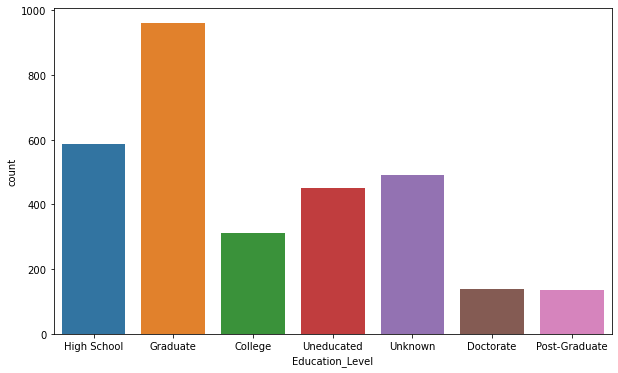

In [44]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x=df['Education_Level'])
plt.show()

In [45]:
df['Education_Level'].value_counts()

Graduate         960
High School      587
Unknown          491
Uneducated       451
College          312
Doctorate        140
Post-Graduate    137
Name: Education_Level, dtype: int64

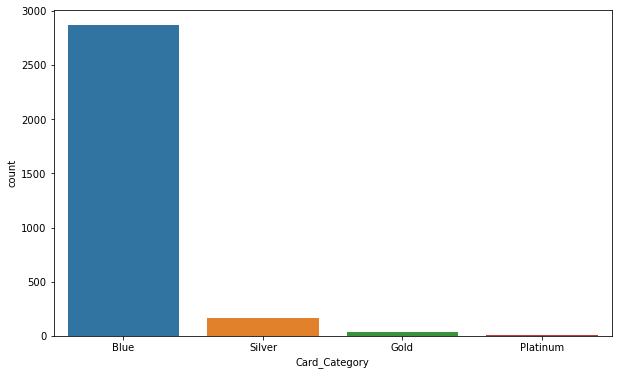

In [46]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x=df['Card_Category'])
plt.show()

In [47]:
df['Card_Category'].value_counts()

Blue        2866
Silver       166
Gold          34
Platinum      12
Name: Card_Category, dtype: int64

# The Numeric Features

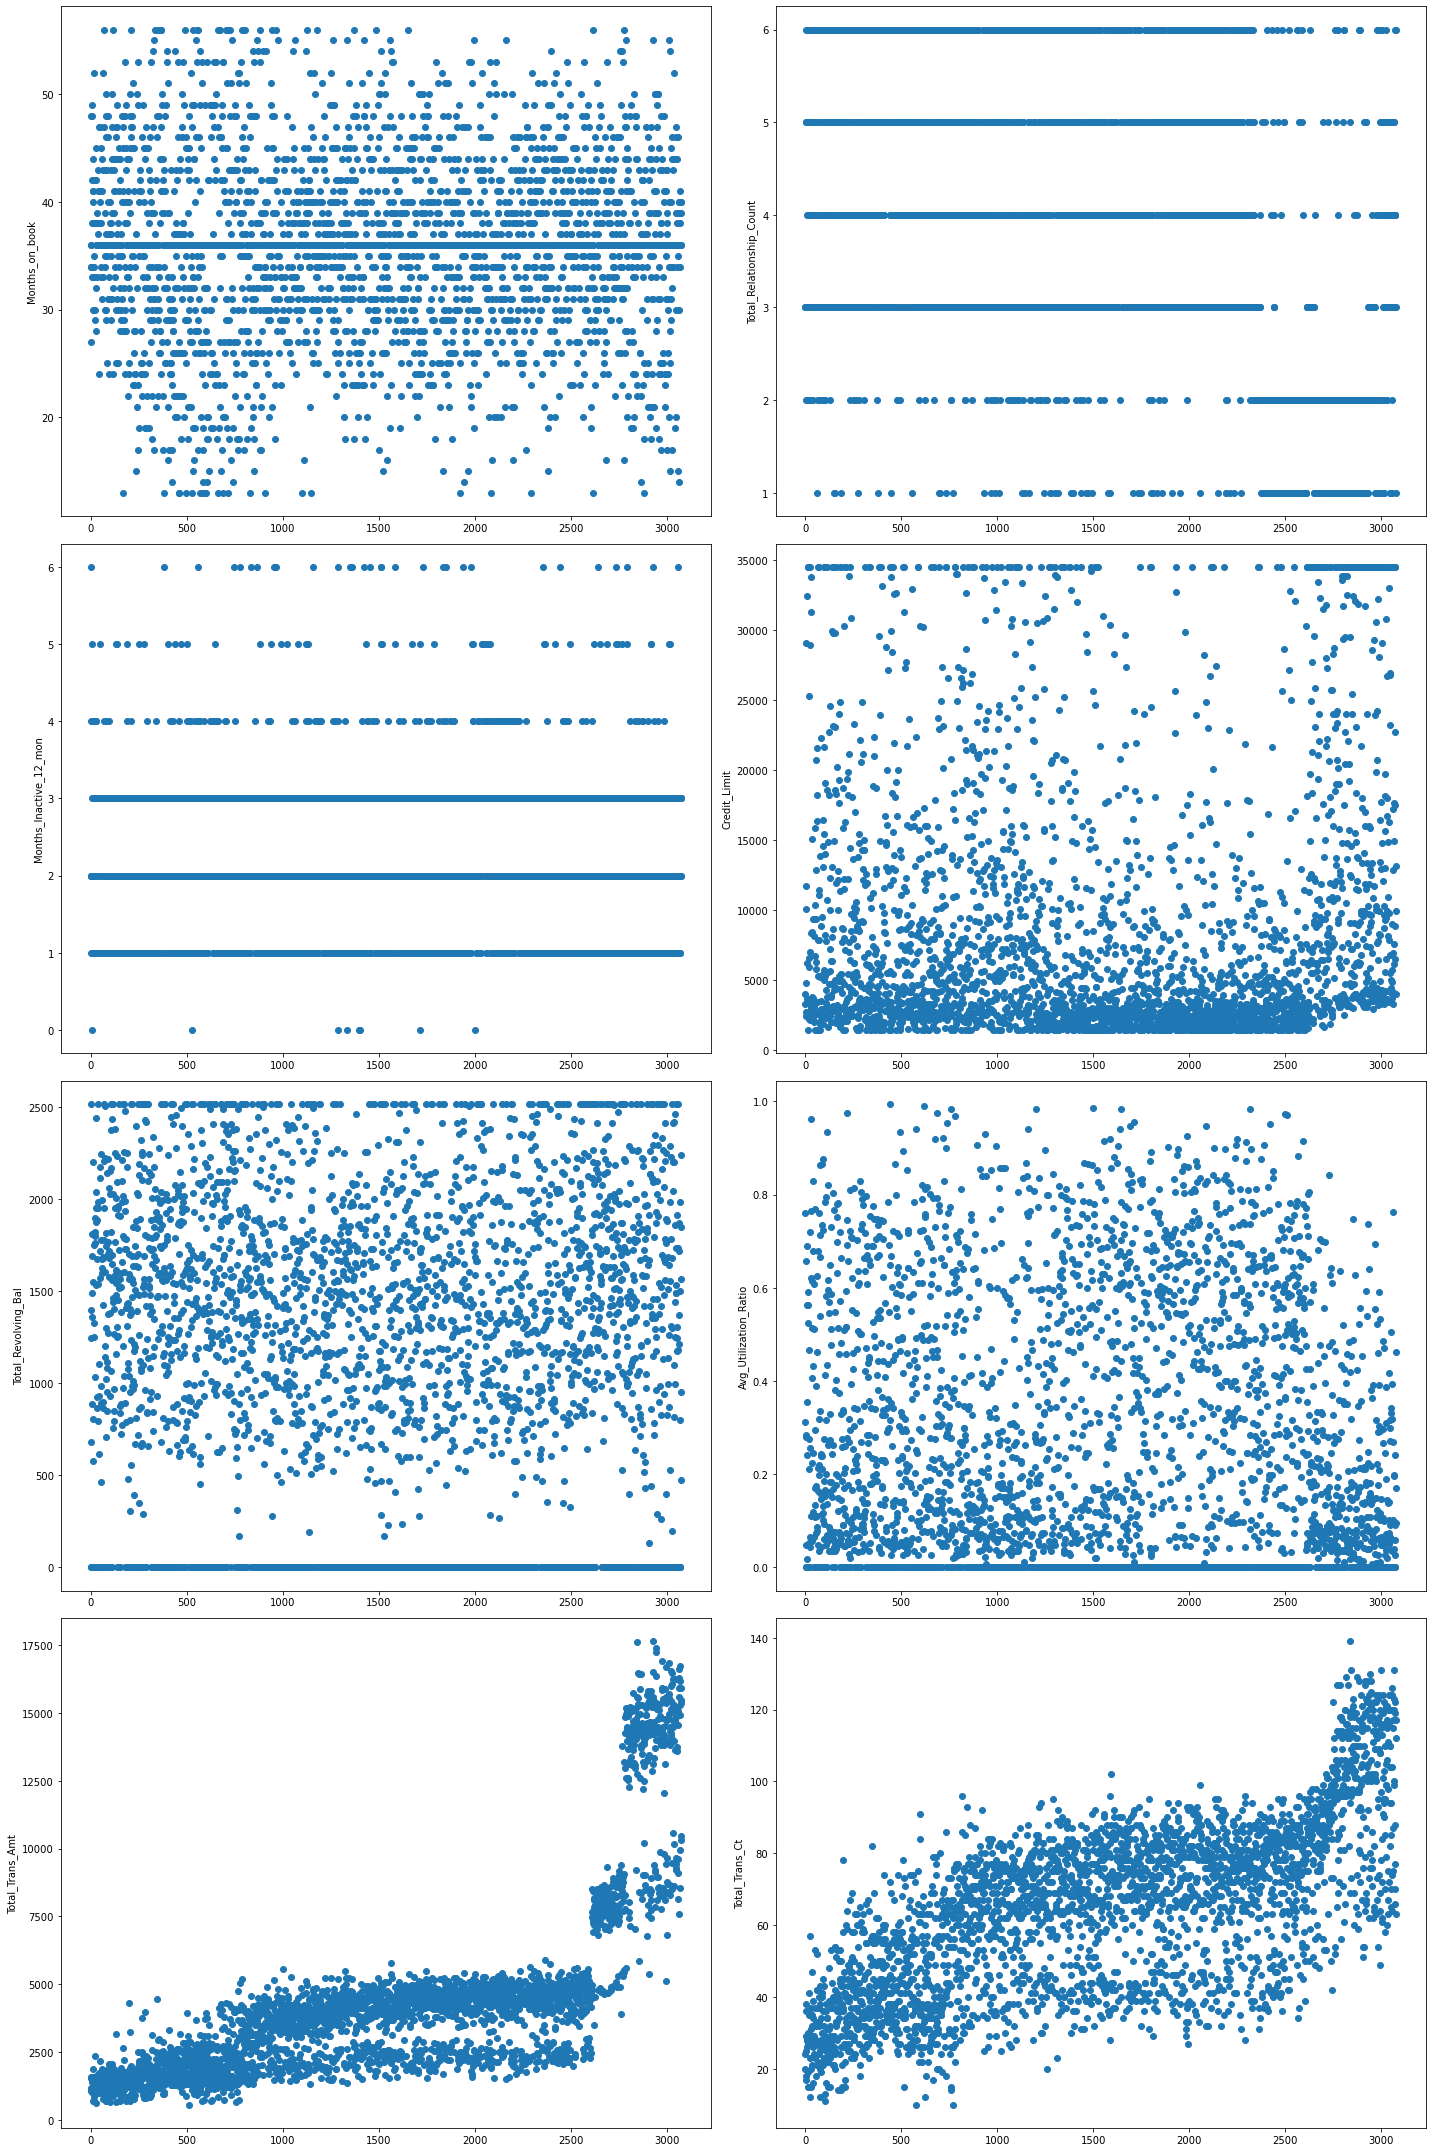

In [48]:
# Visualizing numeric columns #
numeric_cols = df.select_dtypes(include = np.number) ### selects numeric columns

column_names = list(numeric_cols.columns)

col_index = 0

plot_rows = 4
plot_cols = 2

fig, ax = plt.subplots(nrows = plot_rows,ncols=plot_cols,figsize = (20,30))

for row_count in range(plot_rows):
    for col_count in range(plot_cols):
        ax[row_count][col_count].scatter(y = numeric_cols[column_names[col_index]],x=numeric_cols.index)
        ax[row_count][col_count].set_ylabel(column_names[col_index])
        col_index = col_index + 1
        fig.tight_layout()

plt.show()

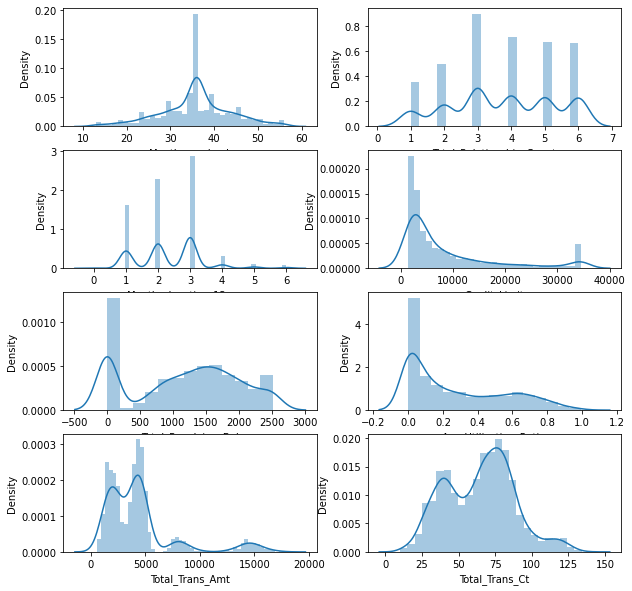

In [53]:
plt.figure(figsize=(10,10))
plot = 1
for cols in column_names:
    ax = plt.subplot(4,2,plot)
    sns.distplot(df[cols])
    plt.xlabel(cols)
    plot+=1
plt.show()

## Statistics Summary

In [13]:
df.describe(include="number", percentiles=[0.01,0.05,0.50,0.75,0.9,0.99])

,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Utilization_Ratio,Total_Trans_Amt,Total_Trans_Ct
count,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000
mean,35.808317,3.748863,2.343405,8644.321670,1157.112411,0.273851,4394.285575,64.541261
std,8.063304,1.555690,0.993973,9162.912233,815.792572,0.277065,3393.536036,23.617003
min,13.000000,1.000000,0.000000,1438.300000,0.000000,0.000000,563.000000,10.000000
1%,15.000000,1.000000,1.000000,1438.300000,0.000000,0.000000,882.090000,19.000000
5%,21.000000,1.000000,1.000000,1438.300000,0.000000,0.000000,1274.700000,28.000000
50%,36.000000,4.000000,2.000000,4511.000000,1279.000000,0.171500,3910.500000,67.000000
75%,40.000000,5.000000,3.000000,10986.750000,1778.500000,0.506000,4751.750000,81.000000
90%,46.000000,6.000000,3.000000,23707.000000,2219.000000,0.707000,8325.900000,92.000000
99%,55.000000,6.000000,5.000000,34516.000000,2517.000000,0.913230,15695.650000,122.000000


In [15]:
# SKEWNESS in the numeric features
df.skew().sort_values(ascending=True)

Total_Revolving_Bal        -0.147920
Months_on_book             -0.138775
Total_Relationship_Count   -0.105005
Total_Trans_Ct              0.148200
Months_Inactive_12_mon      0.525370
Avg_Utilization_Ratio       0.718586
Credit_Limit                1.668109
Total_Trans_Amt             2.011527
dtype: float64

### Note: There are few numeric features with outliers!

In [18]:
# Correlation Check

# To understand the linear relationship between different variables
corr_matrix=df.corr()
corr_matrix

,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Utilization_Ratio,Total_Trans_Amt,Total_Trans_Ct
Months_on_book,1.000000,-0.032182,0.082624,-0.009834,0.027630,0.007982,-0.025801,-0.040549
Total_Relationship_Count,-0.032182,1.000000,-0.012095,-0.067052,-0.015392,0.059938,-0.344939,-0.236084
Months_Inactive_12_mon,0.082624,-0.012095,1.000000,-0.011324,-0.049707,-0.018441,-0.065184,-0.075260
Credit_Limit,-0.009834,-0.067052,-0.011324,1.000000,0.058860,-0.476852,0.189810,0.088515
Total_Revolving_Bal,0.027630,-0.015392,-0.049707,0.058860,1.000000,0.627268,0.055274,0.043875
Avg_Utilization_Ratio,0.007982,0.059938,-0.018441,-0.476852,0.627268,1.000000,-0.102725,-0.017564
Total_Trans_Amt,-0.025801,-0.344939,-0.065184,0.189810,0.055274,-0.102725,1.000000,0.805563
Total_Trans_Ct,-0.040549,-0.236084,-0.075260,0.088515,0.043875,-0.017564,0.805563,1.000000


In [19]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# unstacking 'upper' correlation matrix and sorting it
upper=upper.unstack().sort_values(ascending=True)

# to view the highly positive correlated variables
high_correlation=upper[(upper>=0.75) & (upper<1) & (upper!='Nan')] # Threshold is greater than or equal  to 0.75 but less than 1 
print("The highly positively correlated variables and its value are:\n\n{}".format(high_correlation))

The highly positively correlated variables and its value are:

Total_Trans_Ct  Total_Trans_Amt    0.805563
dtype: float64


In [20]:
# moderately positive correlation
mild_correlation=upper[(upper>=0.5) & (upper<0.75) & (upper!='Nan')]
mild_correlation


Avg_Utilization_Ratio  Total_Revolving_Bal    0.627268
dtype: float64

In [21]:
high_negative_correlation=upper[(upper < -0.5) & (upper!='Nan')]
print("The highly negatively correlated variables and its value are:\n\n{}".format(high_negative_correlation))


The highly negatively correlated variables and its value are:

Series([], dtype: float64)


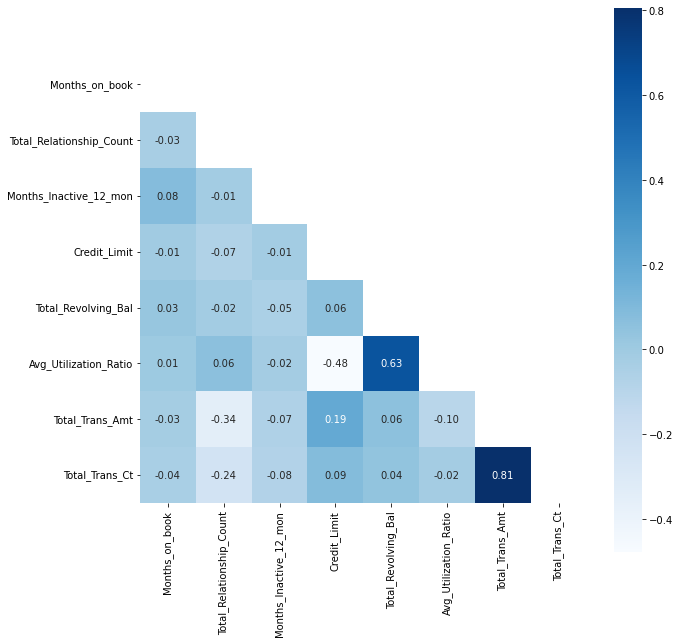

In [22]:
# Heat map
# shows the pearson correlation coefficient(r) between two variables
f, ax = plt.subplots(figsize=(10, 10))
matrix = np.triu(corr_matrix)
sns.heatmap(corr_matrix, annot=True, square=True, mask=matrix,fmt='.2f', cmap='Blues' );
plt.show()

In [23]:
# Split features into Numerical and Categorical

numerical_df = df.select_dtypes(include="number")
char_df = df.select_dtypes(include="object")

In [24]:
def unique_levels(x):
    x=x.value_counts().count()
    return(x)
df_value_counts = pd.DataFrame(numerical_df.apply(lambda x : unique_levels(x)))

df_value_counts.columns=['feature_levels']
df_value_counts

,feature_levels
Months_on_book,44
Total_Relationship_Count,6
Months_Inactive_12_mon,7
Credit_Limit,2387
Total_Revolving_Bal,1311
Avg_Utilization_Ratio,812
Total_Trans_Amt,2366
Total_Trans_Ct,123


In [25]:
numeric_columns = list(numerical_df.columns)
for col in numeric_columns:
    percentiles = numerical_df[col].quantile([0.01, 0.99]).values
    numerical_df[col] = np.clip(numerical_df[col], percentiles[0], percentiles[1])

In [26]:
numerical_df.skew().sort_values(ascending=True)

Total_Revolving_Bal        -0.147920
Months_on_book             -0.119804
Total_Relationship_Count   -0.105005
Total_Trans_Ct              0.134929
Months_Inactive_12_mon      0.306099
Avg_Utilization_Ratio       0.705076
Credit_Limit                1.668109
Total_Trans_Amt             1.986768
dtype: float64

In [44]:
## Remove Features with 0 Variance

from sklearn.feature_selection import VarianceThreshold

varselector= VarianceThreshold(threshold=0)
varselector.fit_transform(numerical_df)

# Get columns to keep and create new dataframe with those only
cols = varselector.get_support(indices=True)
num_1 = numerical_df.iloc[:,cols]

num_1.head()

,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Utilization_Ratio,Total_Trans_Amt,Total_Trans_Ct
0,34.0,3,4.0,3313.0,2517,0.760,1171.0,20.0
1,36.0,3,1.0,4010.0,1247,0.311,1088.0,24.0
2,27.0,2,2.0,29081.0,1396,0.048,1538.0,36.0
3,36.0,3,5.0,11751.0,0,0.000,1539.0,19.0
4,48.0,5,2.0,2436.0,680,0.279,1570.0,29.0


In [40]:
num_1.var()

Months_on_book              6.393778e+01
Total_Relationship_Count    2.420173e+00
Months_Inactive_12_mon      9.167935e-01
Credit_Limit                8.395896e+07
Total_Revolving_Bal         6.655175e+05
Avg_Utilization_Ratio       7.623109e-02
Total_Trans_Amt             1.133461e+07
Total_Trans_Ct              5.484867e+02
dtype: float64